In [1]:
#notes to self
#use only grey background (skip static) - have pre and post grey. do 1s pre, 1moving, 1post
#randomize presentation
#have functions print out info about shape etc
#fix directions on good brain earlier
#remove pd2 info
#use ants to warp brain!
### remove slow and fast noise!
#make nice box plotter of traces - look at other brains

In [4]:
import sys
print(sys.executable)
backup_path = 

/usr/local/opt/python/bin/python3.7
['', '/Users/lukebrezovec/2P/lysis', '/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '/Users/lukebrezovec/Library/Python/3.7/lib/python/site-packages', '/usr/local/lib/python3.7/site-packages', '/Users/lukebrezovec/flystim', '/usr/local/lib/python3.7/site-packages/IPython/extensions', '/Users/lukebrezovec/.ipython']


In [5]:
sys.path[:] = ['', '/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '/Users/lukebrezovec/Library/Python/3.7/lib/python/site-packages', '/usr/local/lib/python3.7/site-packages', '/Users/lukebrezovec/flystim']

In [8]:
import os

In [9]:
print(os.environ['PYTHONPATH'])

KeyError: 'PYTHONPATH'

In [6]:
import numpy as np

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import os
import os.path as op
from scipy.ndimage import imread
from xml.etree import ElementTree as ET
import sys
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy
from scipy import signal
import h5py
import timeit
import time
import nibabel as nib
import matplotlib.animation as animation
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.patches as patches
import pylab
from matplotlib.colors import hsv_to_rgb
from scipy.ndimage.filters import gaussian_filter
from tqdm import tqdm
from scipy.signal import convolve2d
from numpy.linalg import *
from scipy.linalg import toeplitz
from scipy.ndimage.filters import correlate1d
import scipy.linalg as sl
import scipy.signal as signal

%matplotlib inline

#import my code
from photodiode import Photodiode
from bruker import bruker_timestamps_import
from image_processing import *
from processing_tools import *

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
exp_dir = '/Users/lukebrezovec/2P/data/20180301/fly1' #Select Experiment Directory
photodiode_recording = 'photodiode.csv' #Select Photodiode Recording
xml_name = 'bruker.xml' #Select Bruker xml File
nifti_file = 'brain_8bit.nii' #Select nifti file:

photodiode_first_time = False
bruker_first_time = False

focused_slice = None # if only one slice, put 0; if whole brain, put None; if you want a specific slice, put it

stim_class = 'movingbars'
directions = ['up', 'right', 'down', 'left']
stimtypes = ['grey', 'static', 'moving']
durations = [3000, 3000, 4060]

In [2]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [4]:
# load imaging frame timestamps from Bruker
# if bruker_first_time is True, it loads from xml_name and saves to h5py file; if False it loads the h5py file

timestamps = bruker_timestamps_import(exp_dir, xml_name, bruker_first_time)

loading timestamp data from hdf5 file... done


In [5]:
# load photodiode information from photodiode_recording
photodiode = Photodiode(exp_dir, photodiode_recording, stim_class, directions, stimtypes, photodiode_first_time)

loading photodiode data... done
note: access with photodiode.t, .d_1, or .d_2


In [6]:
# load stimtimes
stimtimes = pd.read_hdf(op.join(exp_dir, 'stimtimes.h5'),'stimtimes')

In [7]:
# NEED THIS ON FOR STANDARD AVG ANALYIS REGIME
#stimtimes = stimtimes[stimtimes.epoch_pd1 == 'grey']
#stimtimes = stimtimes.reset_index(drop=True)

In [8]:
# load nifti file ###
vol = load_nifti(exp_dir, nifti_file)

In [9]:
# optional: sparsen data or select specific time regions to analyze
# half = int(len(vol[0,0,0,:])/2)
#vol = vol[:,:,:,3700:]
#timestamps = timestamps[3700:,:]

In [10]:
# Initialize Brain (moving bars)
brain = Brain(vol,
              timestamps,
              stimtimes,
              xml_name,
              exp_dir,
              directions,
              stimtypes,
              durations,
              focused_slice)

In [11]:
#brain.stimtimes=brain.stimtimes.iloc[::3, :]
#brain.stimtimes=brain.stimtimes.reset_index(drop=True)

In [12]:
# Initialize Brain, for flashes - clean up code with new visual stim
# brain = Brain(vol, timestamps, photodiode.stimtimes, photodiode.stimtimes_verbose, xml_name, exp_dir, focused_slice)

In [13]:
# mask brain
mask_background(brain)

Time Elapsed: 39s


In [200]:
# Calculate STA
# Creates brain.responses and brain.delays dictionaries
# brain.responses[direction stimtype] gives 
calc_sta(brain)

100%|██████████| 41/41 [00:09<00:00,  4.45it/s]


In [201]:
# Moving avg
moving_avg(brain)

Time Elapsed: 47s


In [202]:
# calculate df/f (subtract and divide background)

b_start = 3000 # start of background
b_end = 6000 # end of background
df_over_f(brain,b_start,b_end)

/Users/lukebrezovec/2P/lysis/image_processing.py:169: RuntimeWarning: invalid value encountered in true_divide
  temp = np.divide(temp, background)


In [203]:
# Get mean of each pixel

m_start = 6000 # start of response
m_end = 10060 #end of response
mean_resp(brain,m_start,m_end)

In [204]:
# load stimtimes
stimtimes = pd.read_hdf(op.join(exp_dir, 'stimtimes.h5'),'stimtimes')

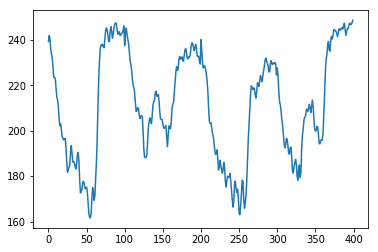

In [205]:
#for direction in directions:
z=12
x=120
y=40
cat_resp = np.concatenate((brain.mov_avg['up'][z,y,x,:],brain.mov_avg['right'][z,y,x,:],brain.mov_avg['down'][z,y,x,:],brain.mov_avg['left'][z,y,x,:]))
plt.plot(cat_resp)

# play with filtering raw data

In [41]:
overtime = bleaching_check(brain)

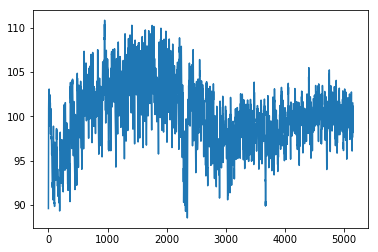

In [250]:
plt.plot(overtime[1:])

In [42]:
import scipy.signal as signal

# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.005 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')

# Second, apply the filter
drift = signal.filtfilt(B,A, overtime)

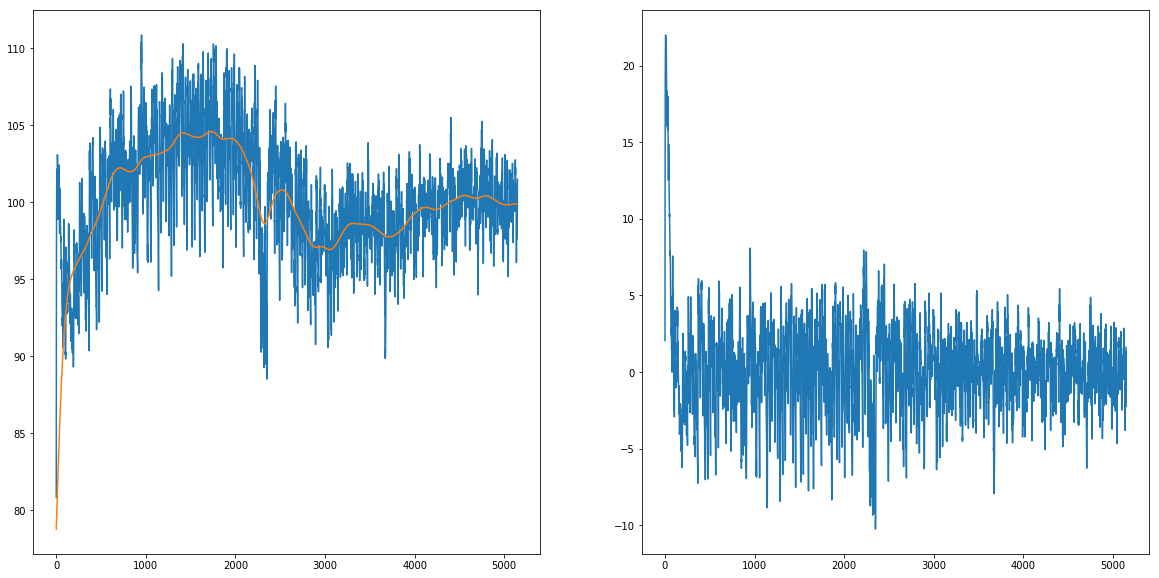

In [43]:
fig= plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(overtime)
plt.plot(drift)
plt.subplot(122)
plt.plot(overtime-drift)

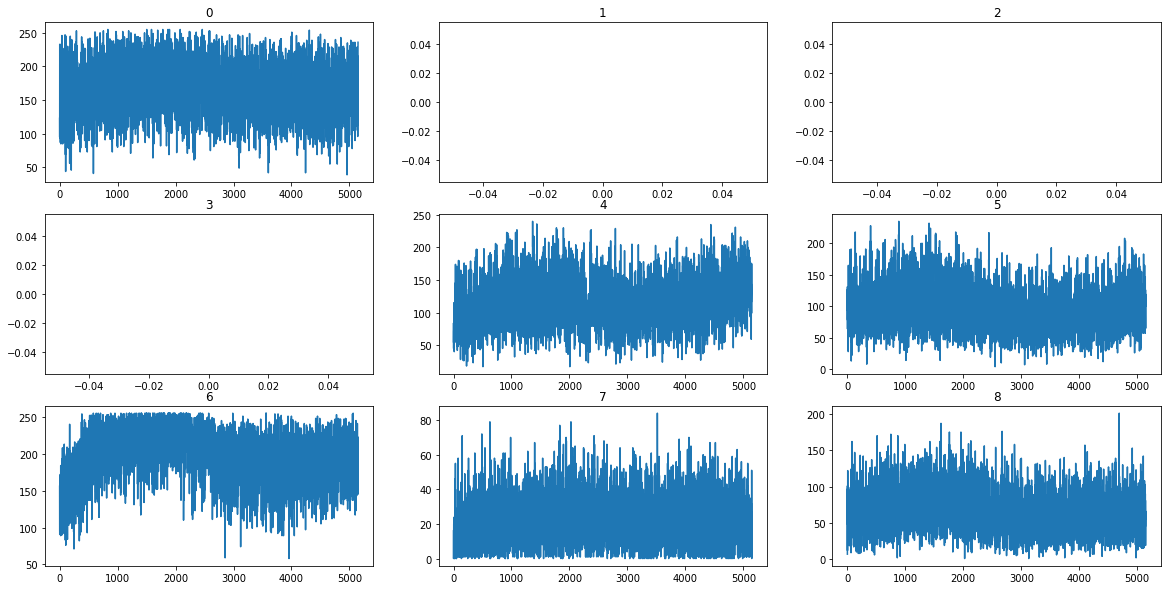

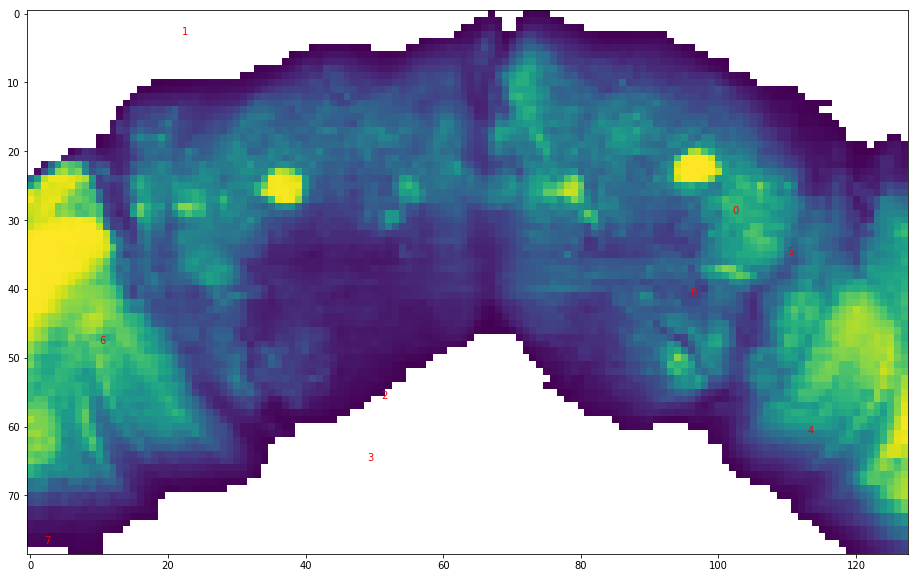

In [38]:
fig= plt.figure(figsize=(20,10))
x = np.random.randint(0, brain.width,9)
y = np.random.randint(0, brain.height,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(brain.vol[z,y[i],x[i],:])
    plt.title(str(i))
    #title = str('y=', y, 'x=',x)
    #plt.title(title)

fig= plt.figure(figsize=(20,10))
plt.imshow(meanbrain[z,:,:])
for i in range(9):
    plt.text(x[i], y[i], str(i), color='r') 

In [31]:
x = np.random.randint(0, brain.width,9)
x

array([ 27,  99, 107,  23, 108,  82, 125, 107, 112])

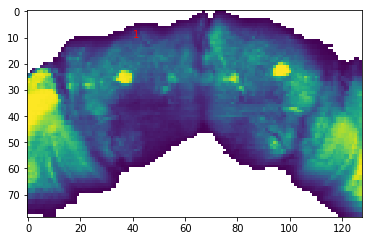

In [25]:
z=17
plt.imshow(meanbrain[z,:,:])
plt.text(x, y, '1', color='r') 

In [22]:
meanbrain = mean_brain(brain)

In [21]:
def mean_brain(brain):
    meanbrain = np.mean(brain.vol, axis=3)
    return meanbrain

In [259]:
brain.vold = np.subtract(brain.vol,drift)

KeyboardInterrupt: 

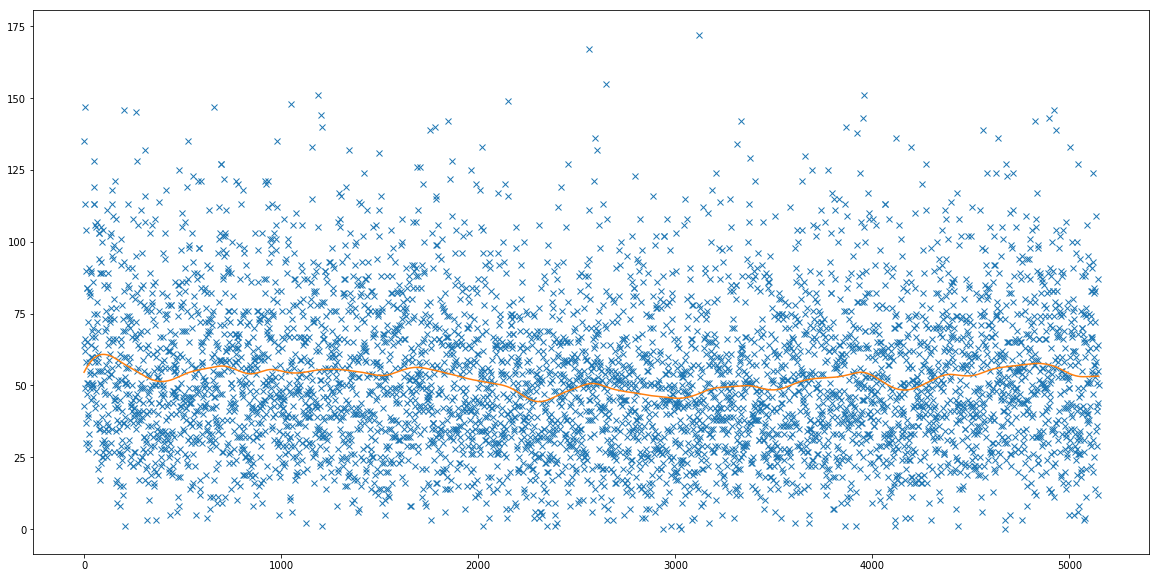

In [276]:
z=17
x=60
y=40
#plt.plot(brain.vol[z,y,x,:])
fig= plt.figure(figsize=(20,10))
drift = signal.filtfilt(B,A, brain.vol[z,y,x,:])
plt.plot(brain.vol[z,y,x,:],'x')
plt.plot(drift)
#plt.plot((brain.vol[z,y,x,:]-drift)[1000:1500])

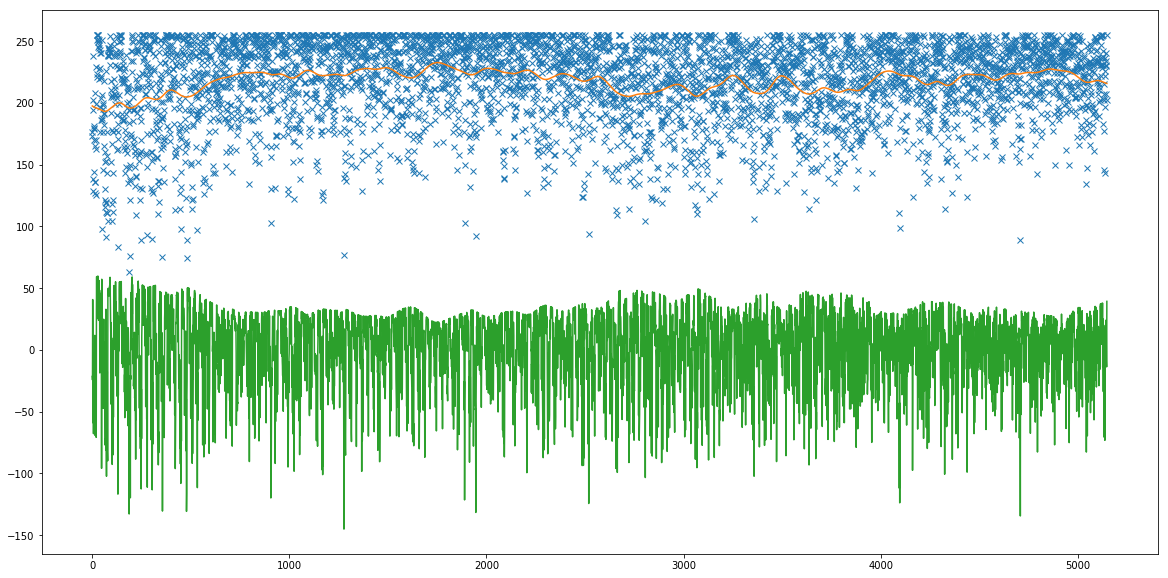

In [253]:
fig= plt.figure(figsize=(20,10))
drift = signal.filtfilt(B,A, brain.vol[z,y,x,:])
plt.plot(brain.vol[z,y,x,:],'x')
plt.plot(drift)
plt.plot(brain.vol[z,y,x,:]-drift)

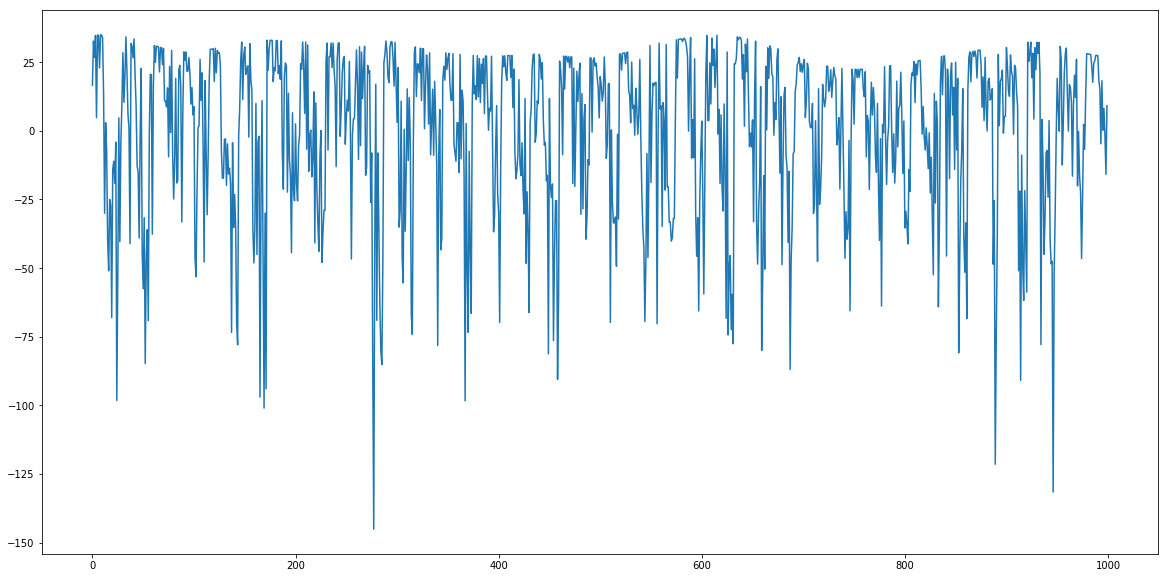

In [257]:
fig= plt.figure(figsize=(20,10))

plt.plot((brain.vol[z,y,x,:]-drift)[1000:2000])

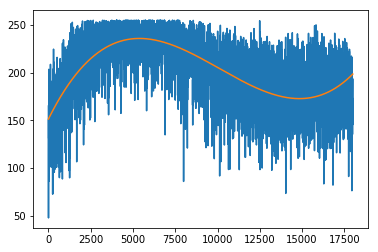

In [63]:
plt.plot(brain.vol_corrected[50,10,:])
#plt.plot(drift)
plt.plot(p(time))

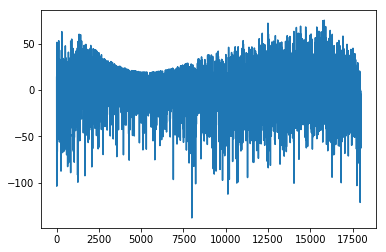

In [64]:
plt.plot(brain.vol_corrected[50,10,:]-p(time))
#plt.plot(np.mean(brain.vol_corrected[50,10,:]))

# Fresh and tidy fMRI style

###### to do:
    - try spatial smooting of raw signal
    - better butter filter
    - canonical response calc with independent voxels and directions
    - pool all voxels for canonical resp
    - cross validation

##### Prepare Data

In [14]:
brain.vol_smoothed = np.zeros(brain.vol.shape)
for z in tqdm(range(brain.num_slices)):
    for t in range(brain.vol.shape[3]):
        brain.vol_smoothed[z,:,:,t] = gaussian_filter(brain.vol[z,:,:,t],sigma=1,mode='constant',cval=np.nan,truncate=1)

100%|██████████| 41/41 [02:16<00:00,  3.58s/it]


In [15]:
def interp_data(brain, resolution, z):
    #resolution is in ms
    interp = interp1d(brain.timestamps[:,z], brain.vol_smoothed[z,:,:,:], fill_value='extrapolate')
    xnew = np.arange(0,brain.timestamps[-1,z],resolution) #0 to last time at subsample res
    y = interp(xnew)
    return xnew, y

In [16]:
resolution = 100 #desired resolution in ms
z = 17
time, brain.vol_corrected_full = interp_data(brain,resolution,z)

##### Correct for drift

In [17]:
# if i wanted a cut off of 100sec, that is .01, but since 100ms res, 
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.001 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')

In [18]:
drift = signal.filtfilt(B,A, brain.vol_corrected_full, axis=2)
brain.vol_corrected_full = brain.vol_corrected_full-drift

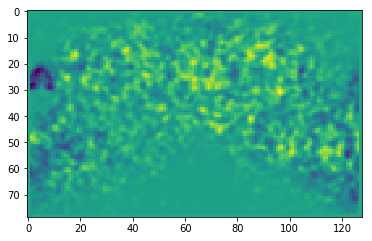

In [23]:
plt.imshow(brain.vol_corrected_full[:,:,0])

##### Divide by drift?

In [132]:
#brain.vol_corrected = brain.vol_corrected/drift

##### WHAT PORTION OF DATA TO USE?

In [19]:
##NEED TO CHANGE TO vol_corrected_FULL

useall = True
full_data_len = brain.vol_corrected_full.shape[2]
if useall == False:
    data_len = int(full_data_len/6)
    data_start = data_len
    data_end = data_len*2
    brain.vol_corrected = brain.vol_corrected_full[:,:,data_start:data_end]
else:
    data_start = 0
    data_end = full_data_len
    brain.vol_corrected = brain.vol_corrected_full

##### Calculate Canonical Response

In [20]:
z=17
x=118
y=47
beta_len = 70 #in resolution units
num_voxel_to_avg = 9

#Form stimtimes01
last_t = int(brain.timestamps[-1,z]/resolution)
desired_stimtype = np.asarray(stimtimes['time(ms)_pd1'])[np.where(stimtimes['epoch_pd1'] == 'moving')]
stimtimes_int = [int(i) for i in desired_stimtype/resolution]
stimtimes01 = np.zeros(last_t)
stimtimes01[stimtimes_int] = 1
stimtimes01 = stimtimes01[data_start:data_end]

#make sure stimtimes01 is as long as vol
extra_zeros = np.shape(brain.vol_corrected)[2]-len(stimtimes01)
if extra_zeros != 0:
    stimtimes01 = np.concatenate((stimtimes01,np.zeros(extra_zeros)))

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


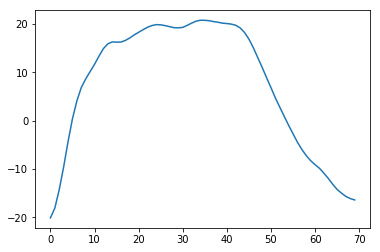

In [21]:
# Form Toeplitz
X = toeplitz(stimtimes01,np.zeros(beta_len))
X = np.tile(X,(num_voxel_to_avg,1))

# Create response vector
Y=[]
for w in range(x,x+3):
    for h in range(y,y+3):
        Y.append(brain.vol_corrected[h,w,:])
Y = np.reshape(Y,(np.size(Y)))

# Solve linear algebra
results = sl.lstsq(X, Y)
canonical_resp = results[0]

plt.plot(canonical_resp)

##### Calculate direction betas

In [24]:
# Create separate stimtime01 vectors for each direction
stimtimes01_dir = {}
for direction in directions:
    cond1 = np.where(stimtimes['epoch_pd1'] == 'moving')
    cond2 = np.where(stimtimes['direction_pd1'] == direction)
    desired_stimtype = np.asarray(stimtimes['time(ms)_pd1'])[np.intersect1d(cond1,cond2)]
    stimtimes01_int = [int(i) for i in desired_stimtype/resolution]
    stimtimes01_dir[direction] = np.zeros(last_t)
    stimtimes01_dir[direction][stimtimes01_int] = 1
    stimtimes01_dir[direction] = stimtimes01_dir[direction][data_start:data_end]
    #make sure stimtimes01 is as long as vol
    extra_zeros = np.shape(brain.vol_corrected)[2]-len(stimtimes01_dir[direction])
    if extra_zeros != 0:
        stimtimes01_dir[direction] = np.concatenate((stimtimes01_dir[direction],np.zeros(extra_zeros)))

In [25]:
#stack vectors  
temp = np.vstack((stimtimes01_dir['up'],stimtimes01_dir['right'],stimtimes01_dir['down'],stimtimes01_dir['left']))
temp = temp.T

#convolve
resp2d = np.reshape(canonical_resp,(beta_len,1))
X2 = convolve2d(temp,resp2d)
X2 = X2[:len(stimtimes01),:]

#X2 = np.tile(X2,(1,brain.height*brain.width))

In [26]:
dir_betas=[]

for w in tqdm(range(brain.width)):
    for h in range(brain.height):
        Y = brain.vol_corrected[h,w,:]
        results = sl.lstsq(X2, Y)
        dir_betas.append(results[0])
        
dir_betas = np.reshape(dir_betas,(brain.width,brain.height,4))
dir_betas = np.swapaxes(dir_betas,0,1)

100%|██████████| 128/128 [00:09<00:00, 13.05it/s]


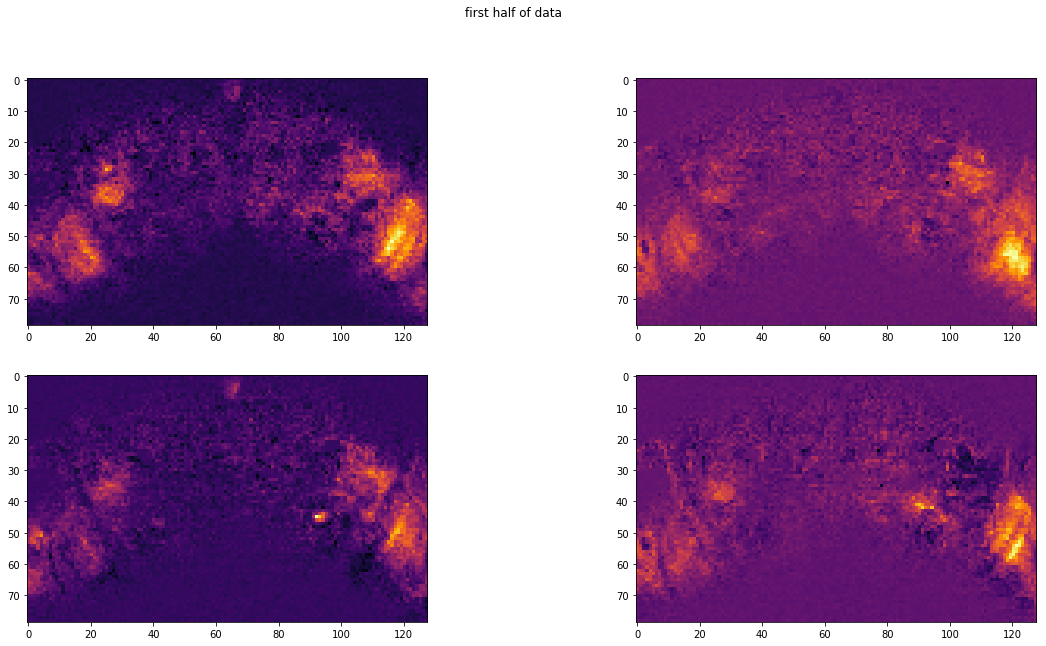

In [81]:
fig = plt.figure(figsize=(20,10))
plt.suptitle('first half of data')
plt.subplot(221)
plt.imshow(dir_betas[:,:,0],cmap='inferno')
plt.subplot(222)
plt.imshow(dir_betas[:,:,1],cmap='inferno')
plt.subplot(223)
plt.imshow(dir_betas[:,:,2],cmap='inferno')
plt.subplot(224)
plt.imshow(dir_betas[:,:,3],cmap='inferno')

##### Calculate R2

In [36]:
r2s = []
predictions = []
for h in tqdm(range(brain.height)):
    for w in range(brain.width):
        predict = {}
        for i, direction in enumerate(directions):
            predict[direction] = np.convolve(stimtimes01_dir[direction],canonical_resp*dir_betas[h,w,i])
            predict[direction] = predict[direction][:len(stimtimes01_dir[direction])]
        prediction = predict['up']+predict['right']+predict['down']+predict['left'] ##FIX QUALITY
        predictions.append(prediction) #for later visualization
        
        
        Y = brain.vol_corrected[h,w,:]
        cor = np.corrcoef(prediction, Y)
        r2 = np.power(cor[0][1],2)
        r2s.append(r2)

r2s = np.reshape(r2s,(brain.height,brain.width))
#predictions = np.reshape(predictions,(brain.height,brain.width,exp_duration)) #Put back later if was to visualize predictions

  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
100%|██████████| 79/79 [00:28<00:00,  2.82it/s]


In [ ]:
fig = plt.figure(figsize=(20,10))
threshold = 0.005
plt.set_cmap('inferno')
plt.subplot(221)
plot = np.copy(dir_betas[:,:,0])
plot[np.where(r2s<threshold)]=0
plt.imshow(plot,vmax=1)

plt.subplot(222)
plot = np.copy(dir_betas[:,:,1])
plot[np.where(r2s<threshold)]=0
plt.imshow(plot,vmax=1)

plt.subplot(223)
plot = np.copy(dir_betas[:,:,2])
plot[np.where(r2s<threshold)]=0
plt.imshow(plot,vmax=1)

plt.subplot(224)
plot = np.copy(dir_betas[:,:,3])
plot[np.where(r2s<threshold)]=0
plt.imshow(plot,vmax=1)

##### Calculate R2 for individual directions, instead of pooling

In [27]:
r2s_dir = {}

for i, direction in enumerate(directions):
    r2s_dir[direction] = []
    for h in tqdm(range(brain.height)):
        for w in range(brain.width):
            prediction = np.convolve(stimtimes01_dir[direction],canonical_resp*dir_betas[h,w,i])
            prediction = prediction[:len(stimtimes01_dir[direction])]
            Y = brain.vol_corrected[h,w,:]
            cor = np.corrcoef(prediction, Y)
            r2 = np.power(cor[0][1],2)
            r2s_dir[direction].append(r2)
    r2s_dir[direction] = np.reshape(r2s_dir[direction],(brain.height,brain.width))

  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
100%|██████████| 79/79 [00:08<00:00,  9.69it/s]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


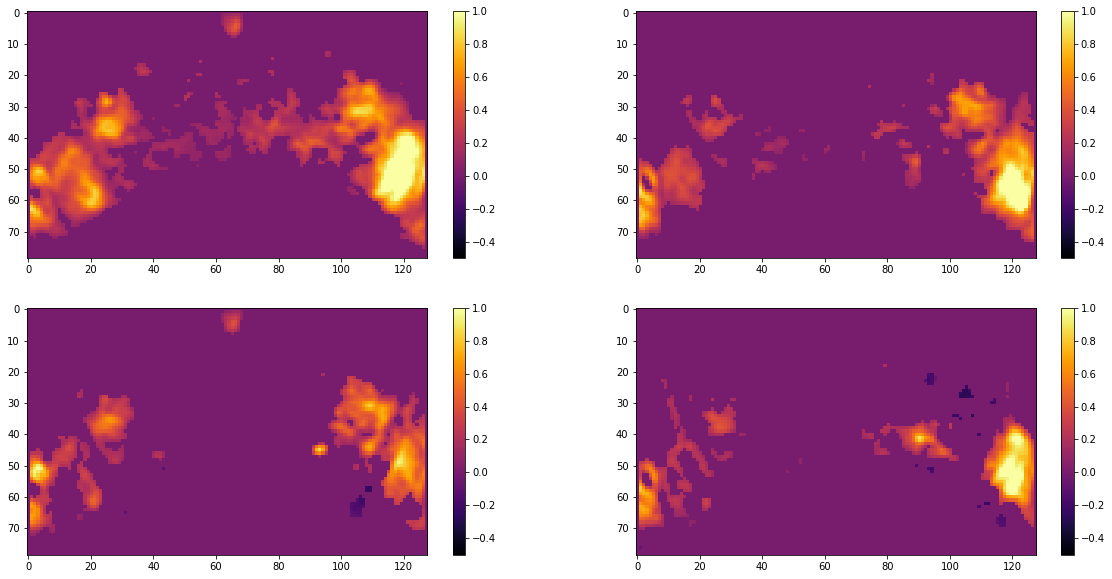

In [31]:
fig = plt.figure(figsize = (20,10))
threshold = 0.008
plt.set_cmap('inferno')
#plt.suptitle('second 5 min')

for i, direction in enumerate(directions):
    plt.subplot(2,2,i+1)
    plot = np.copy(dir_betas[:,:,i])
    plot[np.where(r2s_dir[direction]<threshold)]=0
    plt.imshow(plot,vmin=-.5,vmax=1)
    plt.colorbar()

# CV Version

In [22]:
np.s_[:,:,data_start:data_end]

(slice(None, None, None), slice(None, None, None), slice(0, 3000, None))

In [17]:
#delete 1/6 of data from vol - don't use at all until next step to compare predictions to
#delete 1/6 of data from stimtimes01
#make prediction on the deleted stimtimes01 data
#save that prediction
#once all predictions are calculated, compare this prediction to the deleted 1/6 of vol data

z=17
x=118
y=47
beta_len = 70 #in resolution units
num_voxel_to_avg = 9
num_folds = 6

full_data_len = brain.vol_corrected_full.shape[2]
data_len = int(full_data_len/num_folds)
predictions_folds = []

for fold in range(num_folds):
    data_start = int(fold*data_len)
    data_end = int((fold+1)*data_len)
    #brain.vol_corrected = brain.vol_corrected_full[:,:,data_start:data_end]
    #np.delete(stimtimes01all, np.s_[fold*fold_dur:(fold+1)*fold_dur])
    brain.vol_corrected = np.delete(brain.vol_corrected_full, np.s_[data_start:data_end], axis=2)
    #brain.vol_corrected = np.reshape(brain.vol_corrected, (brain.height,brain.width,data_len))

    
    #Form stimtimes01
    last_t = int(brain.timestamps[-1,z]/resolution)
    desired_stimtype = np.asarray(stimtimes['time(ms)_pd1'])[np.where(stimtimes['epoch_pd1'] == 'moving')]
    stimtimes_int = [int(i) for i in desired_stimtype/resolution]
    stimtimes01 = np.zeros(last_t)
    stimtimes01[stimtimes_int] = 1
    #stimtimes01
    stimtimes01 = np.delete(stimtimes01, np.s_[data_start:data_end])

    #make sure stimtimes01 is as long as vol
    extra_zeros = np.shape(brain.vol_corrected)[2]-len(stimtimes01)
    if extra_zeros != 0:
        stimtimes01 = np.concatenate((stimtimes01,np.zeros(extra_zeros)))

    # Form Toeplitz
    X = toeplitz(stimtimes01,np.zeros(beta_len))
    X = np.tile(X,(num_voxel_to_avg,1))

    # Create response vector
    Y=[]
    for w in range(x,x+3):
        for h in range(y,y+3):
            Y.append(brain.vol_corrected[h,w,:])
    Y = np.reshape(Y,(np.size(Y)))

    # Solve linear algebra
    results = sl.lstsq(X, Y)
    canonical_resp = results[0]

    # Create separate stimtime01 vectors for each direction
    stimtimes01_dir = {}
    for direction in directions:
        cond1 = np.where(stimtimes['epoch_pd1'] == 'moving')
        cond2 = np.where(stimtimes['direction_pd1'] == direction)
        desired_stimtype = np.asarray(stimtimes['time(ms)_pd1'])[np.intersect1d(cond1,cond2)]
        stimtimes01_int = [int(i) for i in desired_stimtype/resolution]
        stimtimes01_dir[direction] = np.zeros(last_t)
        stimtimes01_dir[direction][stimtimes01_int] = 1
        stimtimes01_dir[direction] = stimtimes01_dir[direction][data_start:data_end]
        #make sure stimtimes01 is as long as vol
        extra_zeros = np.shape(brain.vol_corrected)[2]-len(stimtimes01_dir[direction])
        if extra_zeros != 0:
            stimtimes01_dir[direction] = np.concatenate((stimtimes01_dir[direction],np.zeros(extra_zeros)))

    #stack vectors  
    temp = np.vstack((stimtimes01_dir['up'],stimtimes01_dir['right'],stimtimes01_dir['down'],stimtimes01_dir['left']))
    temp = temp.T

    #convolve
    resp2d = np.reshape(canonical_resp,(beta_len,1))
    X2 = convolve2d(temp,resp2d)
    X2 = X2[:len(stimtimes01),:]

    dir_betas=[]

    for w in tqdm(range(brain.width)):
        for h in range(brain.height):
            Y = brain.vol_corrected[h,w,:]
            results = sl.lstsq(X2, Y)
            dir_betas.append(results[0])

    dir_betas = np.reshape(dir_betas,(brain.width,brain.height,4))
    dir_betas = np.swapaxes(dir_betas,0,1)

    predictions = {}
    for i, direction in enumerate(directions):
        predictions[direction] = []
        for h in tqdm(range(brain.height)):
            for w in range(brain.width):
                prediction = np.convolve(stimtimes01_dir[direction],canonical_resp*dir_betas[h,w,i])
                prediction = prediction[:len(stimtimes01_dir[direction])]
                predictions[direction].append(prediction)
        predictions[direction] = np.reshape(predictions[direction],(brain.height,brain.width,len(stimtimes01_dir[direction])))
    predictions_folds.append(predictions)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
100%|██████████| 79/79 [00:05<00:00, 14.56it/s]


In [ ]:
# will have a list
# for each direction, concatenate the predictions and the responses before calculating beta.
# is ok to use normal Y and not concatenate the parts?


for direction in directions:
    for h in range(brain.height):
        for w in range(brain.width):
            for fold in range(num_folds):
                data_start = int(fold*data_len)
                data_end = int((fold+1)*data_len)
                brain.vol_corrected = brain.vol_corrected_full[:,:,data_start:data_end]
            Y = brain.vol_corrected[h,w,:]
            prediction = predictions_folds[fold][direction][h,w,:]

            cor = np.corrcoef(prediction, Y)
            r2 = np.power(cor[0][1],2)
            r2s_dir[direction].append(r2)

                
            
    
    
    

# CV Version End

In [217]:
dir_betas_masked = {}
for i, direction in enumerate(directions):
    dir_betas_masked[direction] = ma.masked_where(r2s_dir[direction]<threshold, dir_betas[:,:,i])

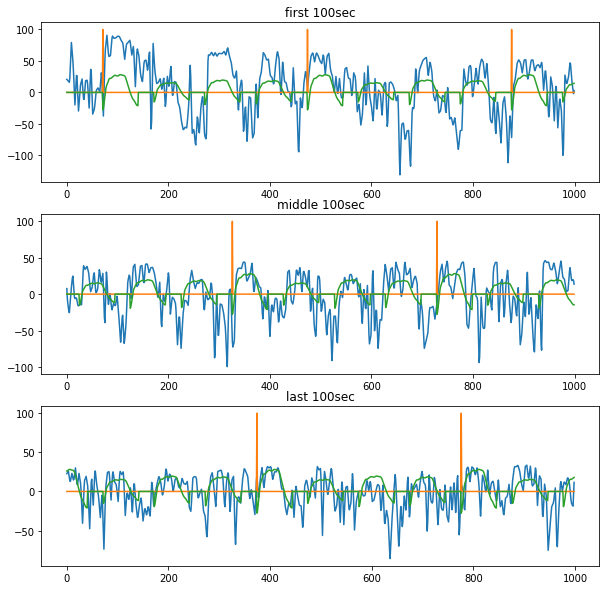

In [37]:
fig = plt.figure(figsize = (10,10))

z=17
x=118
y=47
start = 0
stop = 1000
plt.subplot(3,1,1)
plt.plot(brain.vol_corrected[y,x,start:stop])
plt.plot(stimtimes01_dir['up'][start:stop]*100)
plt.plot(predictions[y,x,start:stop])
plt.title('first 100sec')

start = 9000
stop = 10000
plt.subplot(3,1,2)
plt.plot(brain.vol_corrected[y,x,start:stop])
plt.plot(stimtimes01_dir['up'][start:stop]*100)
plt.plot(predictions[y,x,start:stop])
plt.title('middle 100sec')

start = -1000
stop = -1
plt.subplot(3,1,3)
plt.plot(brain.vol_corrected[y,x,start:stop])
plt.plot(stimtimes01_dir['up'][start:stop]*100)
plt.plot(predictions[y,x,start:stop])
plt.title('last 100sec')

In [27]:
predictions.shape

(79, 128, 18001)

# Sloppy code below

In [197]:
#from matplotlib.colors import hsv_to_rgb
from numpy.linalg import norm
import math
#rgb = hsv_to_rgb(hsv)

#Hue = PD, Saturation = DSI,Value = response amplitude 

HSV_brain = np.zeros((brain.num_slices,brain.height,brain.width,3))
for z in range(brain.num_slices):
    for h in range (brain.height):
        for w in range(brain.width):
            #HUE
            #what is the prefered direction?
            #if right=0,up=90,left=180,down=270
            #for each pixel, we have a value for each direction. 
            #basically, which way does the direction vector point?
            #make vectors for each direction, and take average

            #but wait - are the directions correct?
            #NO! labled as lrud, but actually urdl
#             r = brain.avg_resp['right'][z,h,w]
#             l = brain.avg_resp['down'][z,h,w]
#             d = brain.avg_resp['up'][z,h,w]
#             u = brain.avg_resp['left'][z,h,w]
            
            r = brain.avg_resp['right'][z,h,w]
            d = brain.avg_resp['down'][z,h,w]
            u = brain.avg_resp['up'][z,h,w]
            l = brain.avg_resp['left'][z,h,w]

#             gaussian_filter(r, sigma=.7,mode='constant',cval=np.nan,truncate=1)
#             gaussian_filter(u, sigma=.7,mode='constant',cval=np.nan,truncate=1)
#             gaussian_filter(d, sigma=.7,mode='constant',cval=np.nan,truncate=1)
#             gaussian_filter(l, sigma=.7,mode='constant',cval=np.nan,truncate=1)
            
            r_coor = (r,0)
            u_coor = (0,u)
            l_coor = (-l,0)
            d_coor = (0,-d)

            vectors = (r_coor, u_coor, l_coor, d_coor)
            avg_vector = [sum(y)/len(y) for y in zip(*vectors)]
            ref = [1,0]

            x1 = ref[0]
            y1 = ref[1]
            x2 = avg_vector[0]
            y2 = avg_vector[1]
            dot = x1*x2 + y1*y2
            det = x1*y2 - y1*x2
            angle = math.atan2(det, dot)
            angle = math.degrees(angle)
            if angle < 0:
                angle = angle+360
            HUE = angle

            #DSI
            #what is the selectivity for that direction?
            DSI = norm(avg_vector)*4/sum([norm(r_coor),norm(u_coor),norm(l_coor),norm(d_coor)])
            SAT = DSI

            #Value
            VAL = max(r,u,l,d)
            if VAL < 0:
                VAL=0
            
            HSV = [HUE,SAT,VAL]
            HSV_brain[z,h,w,:] = HSV
            #plt.imshow(mapped_normalized_bystatic[9,:,:],cmap='hot')

for i in range(3):
    HSV_brain[:,:,:,i] = HSV_brain[:,:,:,i]/np.nanmax(HSV_brain[:,:,:,i])
    
HSV_brain2=np.clip(HSV_brain[:,:,:,2]*3,None,1)
HSV_brain4=HSV_brain
HSV_brain4[:,:,:,2]=HSV_brain2

AttributeError: 'Brain' object has no attribute 'avg_resp'

In [19]:
##################
### HSV TO RGB ###
##################

HSV_to_plot = np.zeros((brain.num_slices,brain.height,brain.width,3))
for z in range(brain.num_slices):
    for h in range(brain.height):
        for w in range(brain.width):
            if HSV_brain4[z,h,w,0] is not None:
                HSV_to_plot[z,h,w,:]=hsv_to_rgb(HSV_brain4[z,h,w,:])

In [59]:
u = temp[0,0,0]
u

0.18154794488274392

In [71]:
u = (temp[h,w,0]-minimum)/minimum
u

0.58059427523076867

In [32]:
### for CSHL betas ###

#from matplotlib.colors import hsv_to_rgb
from numpy.linalg import norm
import math
#rgb = hsv_to_rgb(hsv)

#Hue = PD, Saturation = DSI,Value = response amplitude 

HSV_brain = np.zeros((brain.height,brain.width,3))
for h in range (brain.height):
    for w in range(brain.width):
        #HUE
        #what is the prefered direction?
        #if right=0,up=90,left=180,down=270
        #for each pixel, we have a value for each direction. 
        #basically, which way does the direction vector point?
        #make vectors for each direction, and take average
        
        u = dir_betas[h,w,0]
        r = dir_betas[h,w,1]
        d = dir_betas[h,w,2]
        l = dir_betas[h,w,3]

#             gaussian_filter(r, sigma=.7,mode='constant',cval=np.nan,truncate=1)
#             gaussian_filter(u, sigma=.7,mode='constant',cval=np.nan,truncate=1)
#             gaussian_filter(d, sigma=.7,mode='constant',cval=np.nan,truncate=1)
#             gaussian_filter(l, sigma=.7,mode='constant',cval=np.nan,truncate=1)

        r_coor = (r,0)
        u_coor = (0,u)
        l_coor = (-l,0)
        d_coor = (0,-d)

        vectors = (r_coor, u_coor, l_coor, d_coor)
        avg_vector = [sum(y)/len(y) for y in zip(*vectors)] #### PROBLEM HERE
        #avg_vector = np.mean(r_coor, u_coor,l_coor, d_coor)
        ref = [1,0]
        #thing = [len(y) for y in zip(*vectors)]
        #if w==10:
        #    print(thing)
        #print(avg_vector)

        x1 = ref[0]
        y1 = ref[1]
        x2 = avg_vector[0]
        y2 = avg_vector[1]
        dot = x1*x2 + y1*y2
        det = x1*y2 - y1*x2
        angle = math.atan2(det, dot)
        angle = math.degrees(angle)
        if angle < 0:
            angle = angle+360
        HUE = angle

        #DSI
        #what is the selectivity for that direction?
        DSI = norm(avg_vector)*4/sum([norm(r_coor),norm(u_coor),norm(l_coor),norm(d_coor)])
        SAT = DSI

        #Value
        VAL = max(r,u,l,d)
        if VAL < 0:
            VAL=0

        HSV = [HUE,SAT,VAL]
        #print(HSV)
        HSV_brain[h,w,:] = HSV
        #plt.imshow(mapped_normalized_bystatic[9,:,:],cmap='hot')

for i in range(3):
    HSV_brain[:,:,i] = HSV_brain[:,:,i]/np.nanmax(HSV_brain[:,:,i])
    
HSV_brain2=np.clip(HSV_brain[:,:,2]*3,None,1)
HSV_brain4=HSV_brain
HSV_brain4[:,:,2]=HSV_brain2

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [33]:
##################
### HSV TO RGB ###
##################

HSV_to_plot = np.zeros((brain.height,brain.width,3))
for h in range(brain.height):
    for w in range(brain.width):
        if HSV_brain4[h,w,0] is not None:
            HSV_to_plot[h,w,:]=hsv_to_rgb(HSV_brain4[h,w,:])

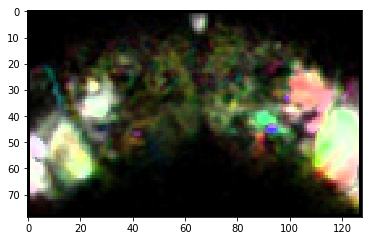

In [34]:
plt.imshow(HSV_to_plot)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


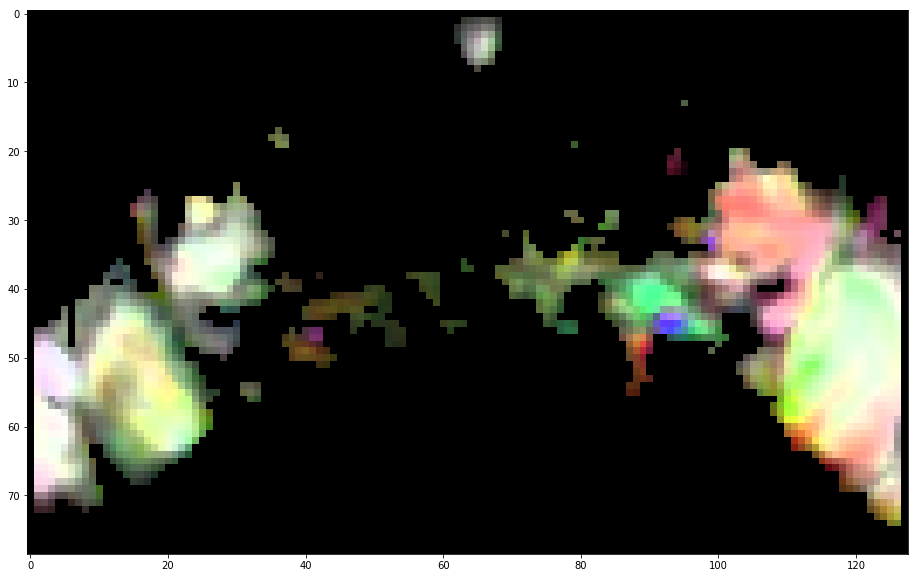

In [41]:
fig = plt.figure(figsize = (20,10))
threshold = 0.02
#plt.set_cmap('inferno')
#plt.suptitle('second 5 min')


toplot = np.copy(HSV_to_plot)
toplot[np.where(r2s<threshold)]=0
plt.imshow(toplot)

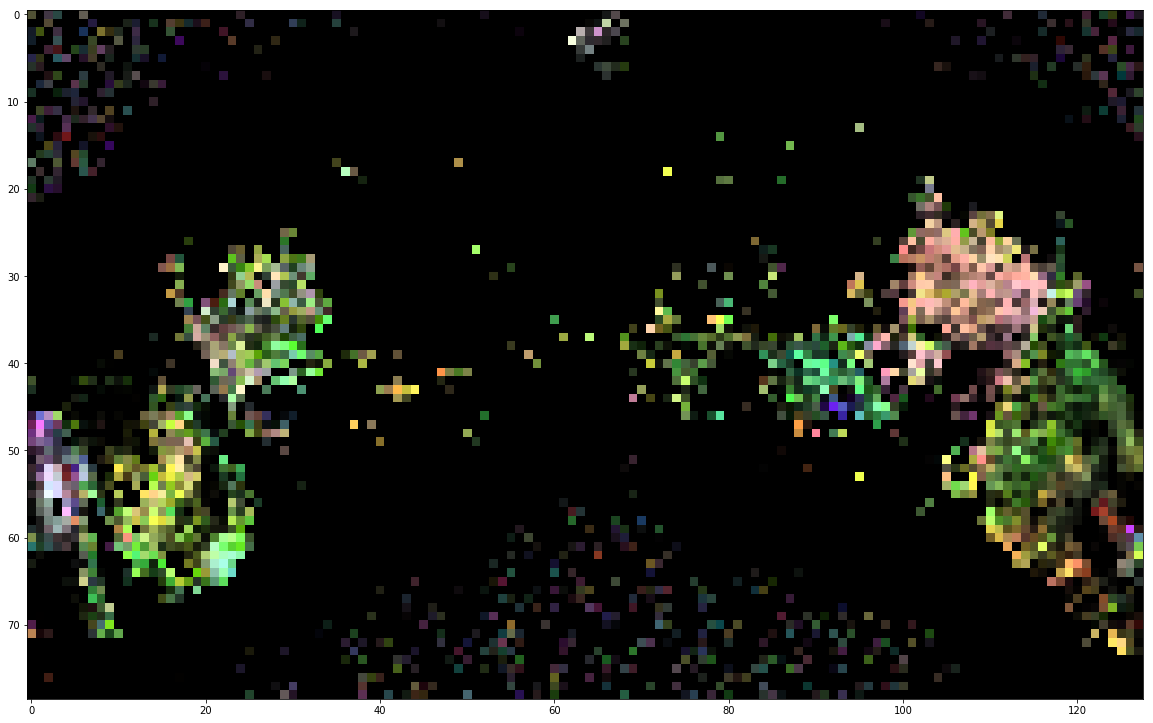

In [402]:
fig = plt.figure(figsize=(20,20))
threshold = 0.005
data = np.copy(HSV_to_plot)
data[np.where(r2s2<threshold)]=0
plt.imshow(data)